In [3]:
# just import
import numpy as np
import matplotlib.pyplot as plt
import math

# Preparation of training and validation datasets

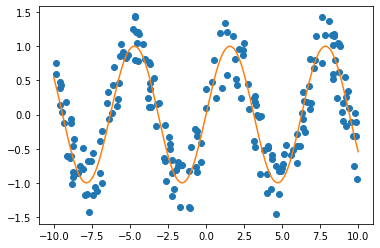

In [4]:
# Train data-set
x_train = np.random.random((200, 1)) * 20 - 10 
y_train = np.sin(x_train) + (np.random.random((200, 1)) - 0.5)

# Validation data-set
x_validation = np.linspace(-10, 10, 200).reshape((200, 1))
y_validation = np.sin(x_validation)

plt.plot(x_train, y_train, 'o')
plt.plot(x_validation, y_validation);

# Network architecture

The neural network will have two layers, ten neurons in the first and one in the second (as in the picture below)

<img src="SineNetV2.jpg">

This can be represented as a mathematical function

$$ \hat y = \sum_{i=1}^{10} w^2_i*\sigma(x * w^1_i + b_i^1) + b^2 $$

or using matrices and vectors*

$$ \hat Y = W^2\sigma(W^1x + b^1) + b^2 $$

We implement this using python class

In [19]:
def sigmoid(x):
    return 1 / (1 + math.e**-x)

class SineNet:
    def __init__(self, n_hidden_neurons):
        self.weights1 = np.random.random((n_hidden_neurons, 1)) * 2 - 1 # random numbers
        self.b1       = np.random.random((n_hidden_neurons, 1)) * 2 - 1 # from -1 to 1
        self.act      = sigmoid
        self.weights2 = np.random.random((1, n_hidden_neurons)) * 2 - 1
        self.b2       = np.random.random((1, 1)) * 2 - 1
        
    def forward(self, x):
        if x.ndim == 1:
            x = x.reshape((len(x), 1))
        x = self.weights1@x.T + self.b1 # W1(10, 1)@X.T(1, n_examples) + b1(10, 1) = X(10, n_examples)
        self.layer1_sum = x # saving the result of the summator function
        x = self.act(x) # activation function
        x = self.weights2@x + self.b2 # W2(1, 10)@X(10, n_examples) + b2(1, 1) = y_pred(1, n_examples)
        return x.T # x.T(n_examples, 1)
    
net = SineNet(10)

The function below shows the prediction of the model

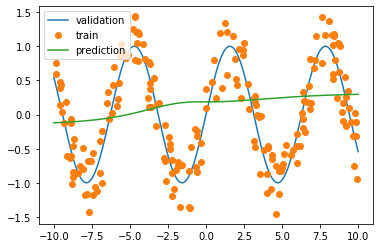

In [20]:
def prediction(net, x, y):
    y_pred = net.forward(x)
    plt.plot(x, y, label="validation")
    plt.plot(x_train, y_train,'o', label="train")
    plt.plot(x, y_pred, label="prediction")
    plt.legend(loc='upper left')

prediction(net, x_validation, y_validation)

# Loss-function

The loss function is our main indicator of network performance<br>
Mean square error (MSE)

In [14]:
def MSE(y_pred, y):
    return ((y_pred - y)**2).mean()

MSE(net.forward(x_validation), y_validation)

2.2422476080234093

# Learning process (back propagation algorithm)

In [8]:
def backprop_single(net, x, y, lr):
    """Learning on a single example"""
    y_pred = net.forward(x) # float
    
    d_2 = 2 * (y_pred - y) # (1, 1)
    net.b2 -= lr * d_2 # (1, 1)
    net.weights2 -= lr * net.act(net.layer1_sum).T * d_2 # (float * (10, 1).T * (1, 1) = (1, 10)
    
    # (10, 1) = (1, 10).T @ (1, 1) * (10, 1) * (10, 1)
    d_1 = net.weights2.T@d_2 * sigmoid(net.layer1_sum) * (1 - sigmoid(net.layer1_sum))
    net.b1 -= lr * d_1 # float * (10, 1)
    net.weights1 -= lr * d_1 * x # float * (10, 1) * (1, 1)

In [10]:
for i in range(4000):
    for j in range(200):
        backprop_single(net, x_train[j], y_train[j], 0.001)
    if i % 200 == 0:
        print(MSE(net.forward(x_validation), y_validation))

0.16058667278374578
0.15571017266271464
0.15149073367698754
0.14776898624344817
0.14442757981936336
0.141379940424628
0.13856264567321808
0.1359300134072155
0.13345001643169221
0.13110103862313902


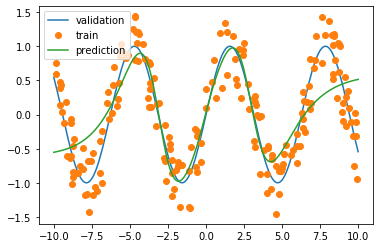

In [11]:
prediction(net, x_validation, y_validation)

Now you can reinit model and test the second solution

In [21]:
def backprop(self, x, y, lr):
    """Learning on a batch of examples"""
    y_pred = self.forward(x) # (200, 1)
    
    d_2 = 2 * (y_pred - y) # число * (200, 1) = (200, 1)
    self.b2 -= lr * np.sum(d_2).reshape((1, 1)) # число * np.sum(200, 1).reshape((1, 1)) = (1, 1)
    self.weights2 -= lr * (self.act(self.layer1_sum) @ d_2).T
    # (1, 10) -= число * ((10, 200) @ (200, 1)).T
    
    d_1 = self.weights2.T@d_2.T * sigmoid(self.layer1_sum) * (1 - sigmoid(self.layer1_sum))
    # (10, 200) = ( (1, 10).T @ (200, 1).T * (10, 200) * (10, 200) ).T
    
    self.b1 -= lr * np.sum(d_1, axis=1).reshape((len(self.b1), 1)) # число * np.sum((200, 10), axis=1) = (10, 1)
    self.weights1 -= lr * d_1 @ x 
    # (10, 1) -= число * (10, 200).T @ (200, 1)

In [22]:
for i in range(40000):
    for j in range(50, 201, 50):
        backprop(net, x_train[j-50:j], y_train[j-50:j], 0.001)
    
    if i % 1000 == 0:
        print(MSE(net.forward(x_validation), y_validation))

0.4677818149934645
0.269424000915039
0.20619517123203795
0.15737320208193994
0.130710518935288
0.11711422721208158
0.10972935558828813
0.10552946697857869
0.10292535509719687
0.10108144613698059
0.09961764352107438
0.09836672148868232
0.0972460539843937
0.09620232229616611
0.09517454184670887
0.09354931232954701
0.0810369306464444
0.07781691598039846
0.07239575443991166
0.06521239724010362
0.05454395055372592
0.046449928004896536
0.042767634633604334
0.041115641671769704
0.04069140116486633
0.040631909337109876
0.04047705785960129
0.04013330540969246
0.039661213358458805
0.03913278371931806
0.03859395494057291
0.038067823474439405
0.037563673207389583
0.037083681827893865
0.03662685522503578
0.03619099733219031
0.03577352994410407
0.03537172724835091
0.03498265070658853
0.03460286188842245


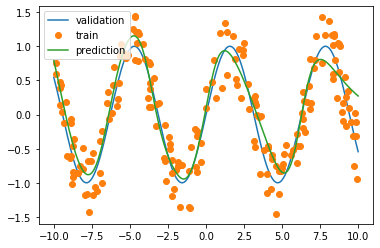

In [23]:
prediction(net, x_validation, y_validation)

Well, as we can see it works pretty good. Also, you might have noticed that the second solution much faster than the first (the power of NumPy).

You can play with the model. For example, try to increase/reduce number of neurons or change learning rate